# Intro to Machine Learning with Time Series
## Prelude: cross-sectional regression using scikit-learn
### Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [2]:
diabetes = load_diabetes()

print(diabetes.keys())

# print(diabetes['DESCR'])

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


```
Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.
(https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)
```

In [3]:
X = diabetes['data']
y = diabetes['target']

print(type(X), type(y))
print(X.shape, y.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(442, 10) (442,)


In [4]:
pd.DataFrame(X, columns=diabetes['feature_names']).head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


### Workflow
1. Model specification

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

rndForest = RandomForestRegressor()

(331, 10) (111, 10) (331,) (111,)


2. Fitting

In [6]:
rndForest.fit(X_train,y_train)

RandomForestRegressor()

3. Prediction

In [7]:
y_pred = rndForest.predict(X_test)

4. Evaluation

In [8]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3775.602146846847

### Modular model building
- Pipelining and transformers
- Tuning
- Ensembling

Pipeline example

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [10]:
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
mean_squared_error(y_test,y_pred)

3958.8072072072077

### Summary
- scikit-learn algorithms do not assume any temporal dependency or ordering
- scikit-learn covers three learning tasks: cross-sectional classification, regression, clustering

## Machine Learning with Time Series
### Multiple data formats
#### Univariate data
Univariate data are repeated observations over time of a single variable or kind of measurement

(<Figure size 1600x400 with 1 Axes>,
 <AxesSubplot:ylabel='Number of Lynx trappings'>)

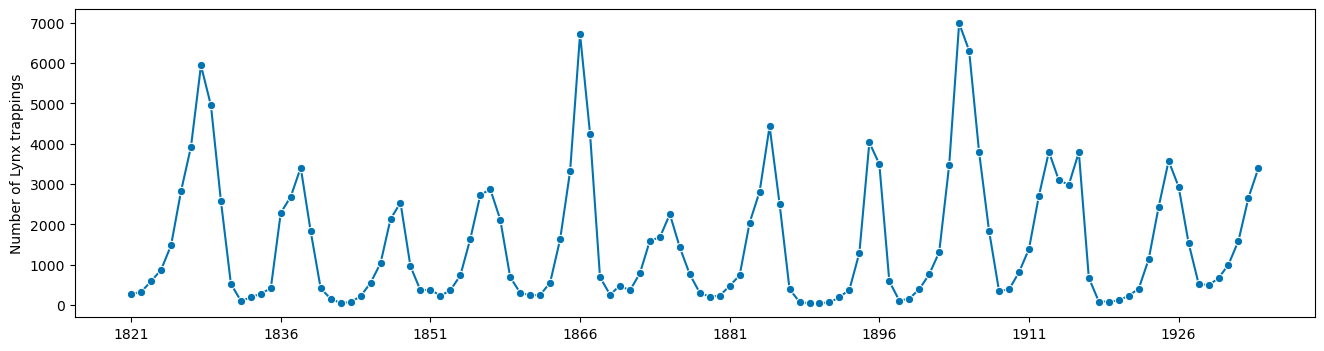

In [11]:
from sktime.datasets import load_lynx
from sktime.utils.plotting import plot_series

y = load_lynx()
plot_series(y)

#### Multivariate data
Multivariate data are repeated observations over time from multiple related variables or kinds of measurement

In [12]:
from sktime.datasets import load_longley

y, X = load_longley()

print(X.shape, y.shape)

(16, 5) (16,)


The target series is

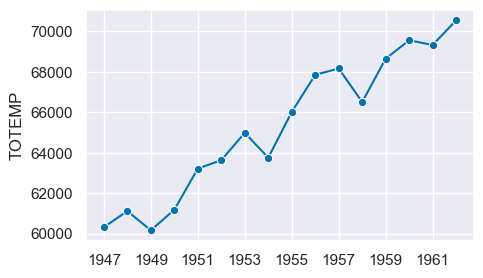

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

with sns.plotting_context('notebook'):
    ps_fig, ps_ax = plt.subplots(figsize=(5,3))
    plot_series(y,ax=ps_ax)

The input series are

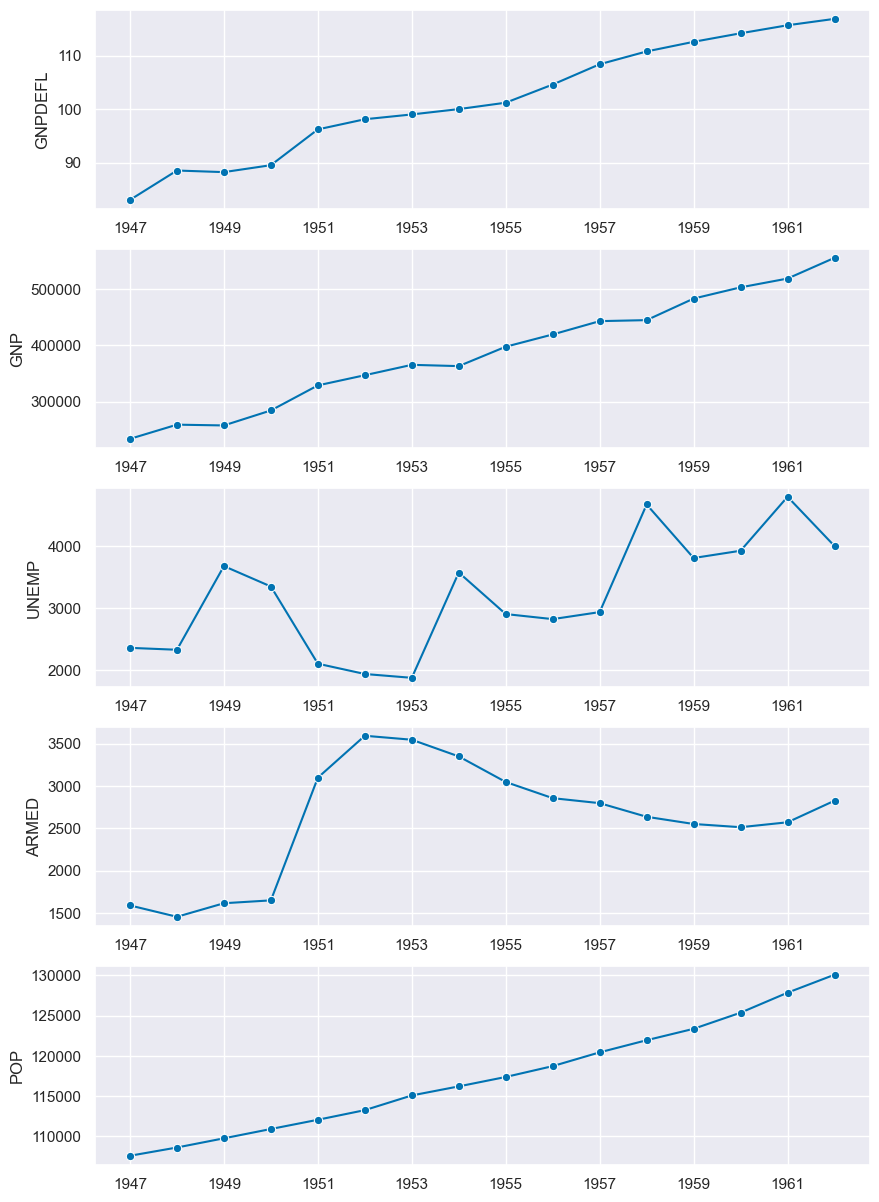

In [14]:
ps_fig, ps_ax = plt.subplots(5,1,figsize=(10,15))

for i,column in enumerate(X.columns):
    plot_series(X[column],ax=ps_ax[i])

#### Panel data
Panel data are repeated observations over tme on multiple experimental units from one or more related variables or kinds of measurement

In [15]:
import matplotlib.pyplot as plt
from sktime.datasets import load_arrow_head
from sktime.datatypes import convert

In [17]:
X,y = load_arrow_head(return_X_y=True)
X = convert(X, from_type='nested_univ', to_type='numpy3D')

[Text(0, 0.5, 'Scaled distance from midpoint'), Text(0.5, 0, 'Index')]

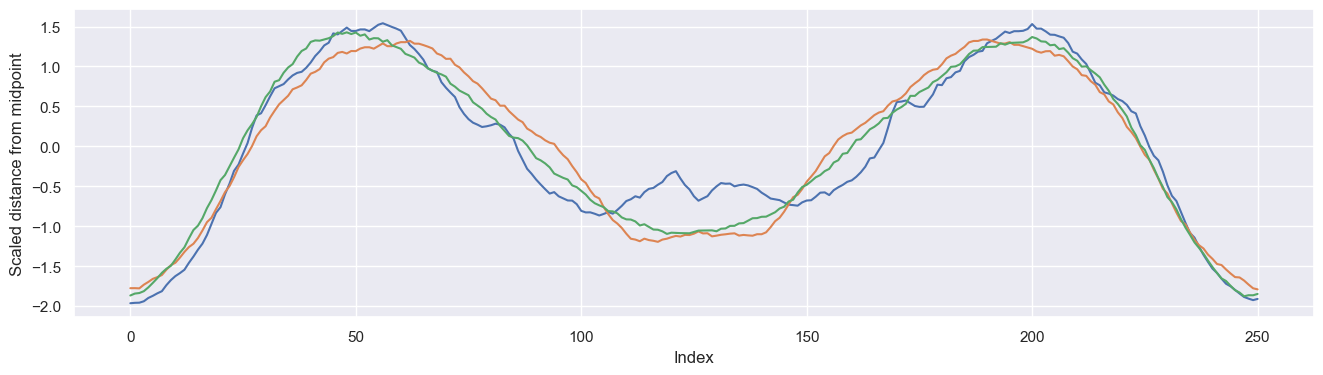

In [19]:
labels, counts = np.unique(y, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels: 
    ax.plot(X[y == label, 0, :][0], label = f'class {label}')
ax.set(ylabel='Scaled distance from midpoint', xlabel='Index')

In the example, each color corresponds to data coming from a different independent sample

> Actually, according to [other sources](https://stats.stackexchange.com/questions/332411/difference-between-multivariate-time-series-data-and-panel-data), there are three types of time series data: 
>- Time series: one-dimensional data; each row is identified by a timestamp
>- Time series dataset: multi-dimensional data; each row is identified by a timestamp
>- Panel dataset: multi-dimensional data; each row is identified by a timestamp together with one or more other columns
>
> The term *Multivariate Time Series* is therefore used not correctly, since it should refer not to a type of dataset but to a type of analysis in which there is more than one time dependent variable.
>
> See also [this](https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/)

## Time series learning tasks
The most common time series learning tasks are
- Forecasting
- Time series classification
- Time series annotation (e.g., outlier detection)
- Time series clustering

### Reduction: from one learning task to another
![From one learning task to another](https://raw.githubusercontent.com/sktime/sktime-tutorial-pydata-global-2021/fc327883bb6cfedf35c7d12c068fcd5324220bc4/images/reduction-relations.png)
The image shows how it is possible to even use scikit-learn classifiers (or regressors) to solve time series problems, if certain trasformations are performed on the dataset.

### Creating a unified framework with Sktime
- Use time-series as input data
- Multiple learning tasks: forecasting, time series classification, and more
- A common estimator API for each learning task
- Estimator APIs mirror learning tasks

What's a framework?
> A collection of related and reusable software design templates that practitioners can copy and fill in. Frameworks emphasize design reuse. They capture common software design decisions within a given application domain and distill them into reusable design templates. This reduces the design decision they must take, allowing them to focus on application specifics. Not only can practitioners write software faster as a result, but applications will have a similar structure. Frameworks often offer additional functionality like toolboxes. Compare with toolbox and application.